# Machine Learning and Hip-Hop
## Imports

##### We will need the following packages:
* Spotipy
    * Access to Spotify API with Python
    * Spotipy oauth for authorization
* pandas
    * Dataframes and data visualization

In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=\
                          SpotifyClientCredentials(client_id='10abcd80153e480aa1309b5782db7a0a',\
                                                   client_secret='c6c037c908344f439fe469dcfbfb8918'),\
                                                      requests_timeout=50)

In [2]:
# Username and playlist URIs
my_uri = 'spotify:user:mythreya75'
bruh_uri = 'spotify:playlist:5aSx3MwComNfCHqbl5AILS'
#dftr_uri = 'spotify:playlist:64qKTfGYPzL8eOqqYrLrSy'
edm_uri = 'spotify:playlist:6n1PxIopr5Sz60VBwDGpuq'

# The longest rap playlist(415H)
carl_uri = 'spotify:user:wc167m3f2872orl0152wn1gwg'
carlsPlaylistURI = 'spotify:playlist:6Qn4VdrEu9pUrPZBVZTE6C'

# Bumps 2.0 (my playlist)
bumps = 'spotify:playlist:1iVtAjR9ZFFkTcAoOlDqpf'

# The Rap Guru playlist by J. Bond
rapGuru = 'spotify:playlist:2528sgfq9xcGXl5t3u0uxl'
jBond = 'spotify:user:1252421638'

# Adding Evolution of Rap by chrisdaniels503
evolRap = 'spotify:playlist:4OfrDE8E2uDG4LvZrVulp9'
chrisd = 'spotify:user:chrisdaniels503'

# The Longest Rap Mix by Shay Kyser
shay = 'spotify:user:22nd4b3lwdmz2ofxgrgsdwiiq'
rapMix = 'spotify:playlist:17jpHzURZPYRY91mMsNWX4'

# Every tupac song by Sion
sion_uri = 'spotify:user:kz0syi26552pjbac0m4e9t2ct'
everyTupac = 'spotify:playlist:2BMe9e8C05vTFJ8cso5cwd'

# (Almost) Every 50 Cent song by TJ
tj_uri = 'spotify:user:r2ggj4my8d3claivbm5ecrwa6'
fifty = 'spotify:playlist:0yqWCwcqLzEYxN9GfiBw0T'

# Every Eminem song by Braxton Powers
braxton = 'spotify:user:go9q1qbwz4r0lr17i6sgwoz27'
em = 'spotify:playlist:6RM9tl0lQFv5QwyqL8SI3D'

# All Drake Songs On Spotify
bandicoot = 'spotify:user:benbellenger'
drakeSongs = 'spotify:playlist:7b46c5syjtG86a77R7SnMs'

# Htirbd by Kev
saintkev = 'spotify:user:ksamraj15'
htirbd = 'spotify:playlist:2vT3Hk2DmjUmjpf8tqExu5'

# The longest, Best Rap Playlist of All Time by Andy Arson Newton
andy = 'spotify:user:1236304360'
bestRap = 'spotify:playlist:1jbE9QFLknBMs1CJaAhLCC'

# List of playlists for getAllTracks to iterate through 
#playlistURI_List = [[bruh_uri, my_uri],[edm_uri, my_uri]]

playlistURI_List = [[carlsPlaylistURI, carl_uri],[bumps, my_uri],\
                    [rapGuru, jBond], [evolRap, chrisd], [rapMix, shay],\
                    [everyTupac, sion_uri], [fifty, tj_uri], [em, braxton], \
                    [drakeSongs, bandicoot], [htirbd, saintkev], [bestRap, andy]]

In [3]:
def get_playlist_tracks(username,playlist_id):
    results = spotify.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        tracks.extend(results['items'])
    return tracks

# Finds track features for a every song in a playlist
# Parameters => username, playlistURI
# Returns => dictionary of tracks and features 
# (track_features[track_name] = feature_data)
def findTrackFeatures(username, playlistURI):
    count = 1
    offset = 100
    playlistDict = get_playlist_tracks(username, playlistURI)
    track_features = {}
    for track in playlistDict:
        if count % offset == 0 or count == 1:
            print(f"Fetched {count}/{len(playlistDict)} songs")
        elif count == len(playlistDict):
            print(f"Fetched all songs!")
        try:  
            trackID = track['track']['id']
            track_year = track['track']['album']['release_date'][:4]
            feature_data = list(spotify.audio_features(trackID)[0].values())
            feature_data.append(track_year)
            # print(spotify.audio_features(ids)[0])
            track_features[track['track']['name']] = feature_data
            count += 1
        except: pass
    
    return track_features

# Combines track_features dictionaries for every playlist in playlistURI_list
# Parameters => playlists (list of playlists)
# Returns => every tracksAndFeatures in every playlist from input
def getAllTracks(playlists):
    all_tracks = {}
    for playlist in playlists:
        playlistURI = playlist[0]
        # Display playlist label
        print(spotify.playlist(playlist_id=playlistURI,fields="name")['name'], end=":\n")
        
        user = playlist[1]
        
        newPlaylistTrackFeatures = findTrackFeatures(user, playlistURI)
        # This syntax lets you effectively concatenate a dictionary
        # all_tracks[track name] = feature_data
        all_tracks = all_tracks | newPlaylistTrackFeatures
        print("\n")
        
    return all_tracks

tracksAndFeatures = getAllTracks(playlistURI_List)

The longest rap playlist (417H):
Fetched 1/7760 songs
Fetched 100/7760 songs
Fetched 200/7760 songs
Fetched 300/7760 songs
Fetched 400/7760 songs
Fetched 500/7760 songs
Fetched 600/7760 songs
Fetched 700/7760 songs
Fetched 800/7760 songs
Fetched 900/7760 songs
Fetched 1000/7760 songs
Fetched 1100/7760 songs
Fetched 1200/7760 songs
Fetched 1300/7760 songs
Fetched 1400/7760 songs
Fetched 1500/7760 songs
Fetched 1600/7760 songs
Fetched 1700/7760 songs
Fetched 1800/7760 songs
Fetched 1900/7760 songs
Fetched 2000/7760 songs
Fetched 2100/7760 songs
Fetched 2200/7760 songs
Fetched 2300/7760 songs
Fetched 2400/7760 songs
Fetched 2500/7760 songs
Fetched 2600/7760 songs
Fetched 2700/7760 songs
Fetched 2800/7760 songs
Fetched 2900/7760 songs
Fetched 3000/7760 songs
Fetched 3100/7760 songs
Fetched 3200/7760 songs
Fetched 3300/7760 songs
Fetched 3400/7760 songs
Fetched 3500/7760 songs
Fetched 3600/7760 songs
Fetched 3700/7760 songs
Fetched 3800/7760 songs
Fetched 3900/7760 songs
Fetched 4000/7760 s

In [ ]:
# Add a playlist's songs to the current library

def addPlaylist(username, playlistURI, tracksWithFeatures):
    tracksWithFeatures = tracksWithFeatures | getAllTracks([[playlistURI, username]])
    return tracksWithFeatures

In [4]:
# Checking how much length of library has increaseed
len(tracksAndFeatures)

14855

In [11]:
# Creating dataframe
pd.set_option('display.max_rows', None)
raw_df = pd.DataFrame.from_dict(tracksAndFeatures, orient="index", columns=['danceability', 'energy','key', \
                                                                        'loudness', 'mode', 'speechiness',\
                                                                        'acousticness', 'instrumentalness', \
                                                                        'liveness', 'valence', 'tempo', 'type',\
                                                                        'id', 'uri', 'track_href', 'analysis_url',\
                                                                        'duration_ms', 'time_signature',\
                                                                        'release_year'])

In [16]:
spotifyFeatures = raw_df[['danceability','energy','key',\
                      'loudness','mode','speechiness',\
                      'acousticness','instrumentalness', 'liveness',\
                      'valence','tempo', 'duration_ms', 'release_year']]
#spotifyFeatures

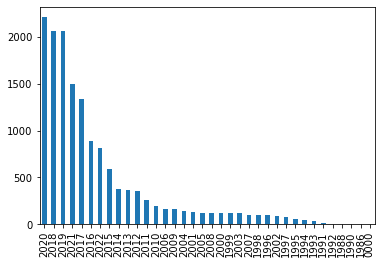

In [17]:
# Plot year distribution
yearCount = spotifyFeatures['release_year'].value_counts().plot(kind='bar', sort_columns=True)

In [19]:
spotifyFeatures.to_csv('out.csv')